In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

### EDA with Mysql

In [2]:
# connecting to  localhost server:
con = mysql.connector.connect(
   host = 'localhost',
   port =  3306,
   user =  'root', 
   password = '******',
   database = 'studdb')

In [3]:
df = pd.read_sql_query("select * from studmarks", con)

In [4]:
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [5]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


With the above stats from the describe table, the data is fairly skewed as there are considerable differences in means and medians of the data.

In [6]:
df.DOB = pd.to_datetime(df.DOB)

In [7]:
# creating new column age based on current year.
df['Age'] = 2020 - df.DOB.dt.year

In [8]:
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Age
0,John,M,1988-05-04,55,45,56,87,21,52,89,65,32
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2,33
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,31
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45,30
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53,31
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52,32
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61,33
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87,31
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89,30
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77,31


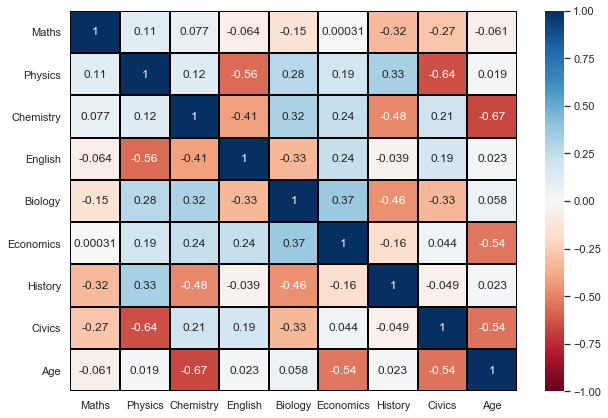

In [24]:
plt.figure(figsize = (10,7))
sb.heatmap(df[list(df.columns[3:])].corr(), cmap = 'RdBu', vmin = -1, vmax = 1,
          center = 0, linewidth = 1, linecolor = 'black', annot = True)
plt.show()

From above heatmap, we can infer that younger students tend to score better (or) age is  moderately and negatively correlated with Chemistry, Civics and Economics.

Also, students scoring well in Physics may not score well in English or Civics, as they are negatively correlated.

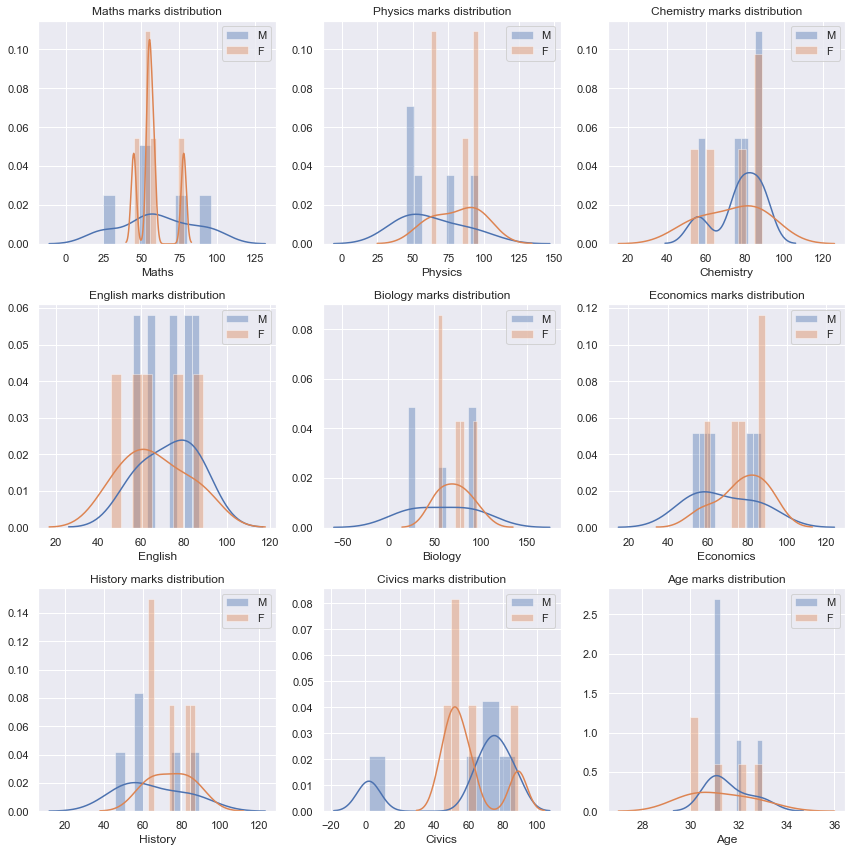

In [22]:
# visulazing distribution of marks among different gender of students:
for i, col in enumerate(df.columns[3:]):
    plt.subplot(3,3, i+1)
    sb.distplot(df[col][df['Gender'] == 'M'] , bins = 9)
    sb.distplot(df[col][df['Gender'] == 'F'], bins = 9)
    plt.legend(['M','F'])
    
    plt.title(col+' marks distribution')
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.tight_layout()
plt.show()

Here, female students comparatively performed better then the male counterpart in subjects like Biology,History,Physics,Economics.
Whereas, male students performed better in other remaining subjects.
Also, 31 is most commom age for male students, whereas, 30 is most commom for female students.

*****Average and std of marks/age*****
average of Maths : 59.6 
 std in Maths : 19.46050130677807 

average of Physics : 72.3 
 std in Physics : 20.661558508495915 

average of Chemistry : 75.3 
 std in Chemistry : 14.000396819773043 

average of English : 69.7 
 std in English : 14.453373308677804 

average of Biology : 64.7 
 std in Biology : 26.998148084637215 

average of Economics : 72.7 
 std in Economics : 14.629118603357862 

average of History : 69.7 
 std in History : 14.453373308677806 

average of Civics : 60.5 
 std in Civics : 25.343199833047482 

average of Age : 31.4 
 std in Age : 1.0749676997731399 



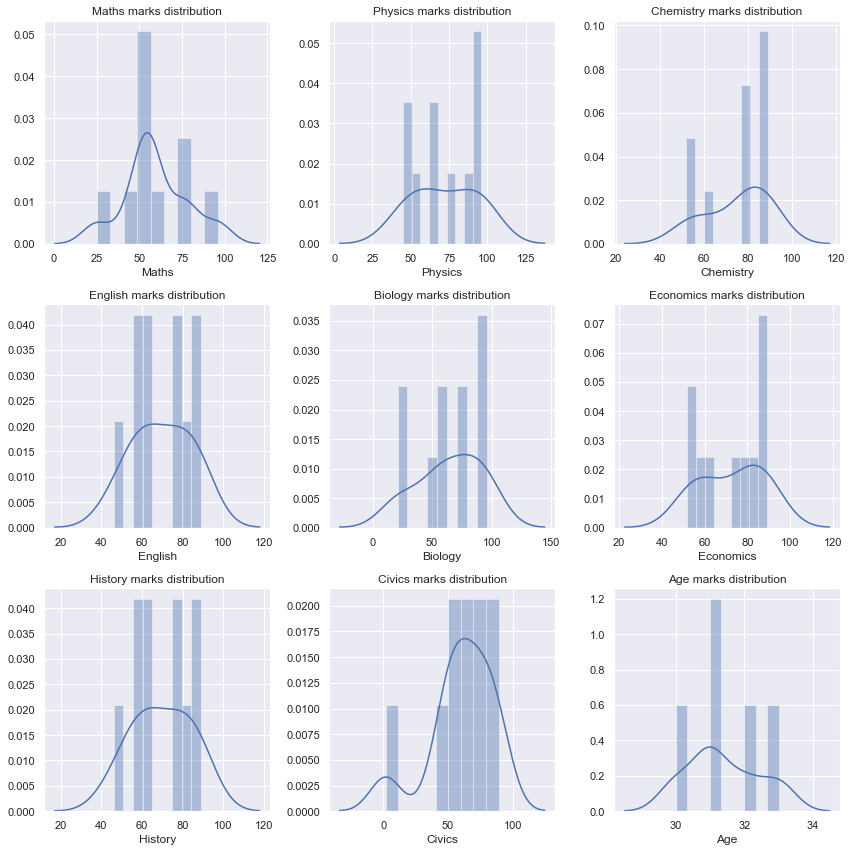

In [48]:
# printing mean and std of marks/age of student in each subjects.
print('*****Average and std of marks/age*****')
for col in df[list(df.columns[3:])]:
    print('average of',col,':',df[col].mean(),'\n','std in',col,':',df[col].std(), end = ' ')
    print('\n')

    # visulazing distribution of marks/age among students:   
for i, col in enumerate(df.columns[3:]):
    plt.subplot(3,3, i+1)
    sb.distplot(df[col], bins = 9)
    
    plt.title(col+' marks distribution')
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.tight_layout()
plt.show()

From above dist plot and the printed mean and std,students at Maths and Civics performed worst overall and definitely requires improvements.
Whereas, Physics and Chemistry are those subjects that students performed the best overall, particularly the Chemistry marks with more students performing well.
Also, 31 is the most common age overall.